# 1. initialization
## split the data

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('/Users/xuche/workspace/udacity/machine-learning/titanic_survival_exploration/titanic_data.csv')


# train_test_split
X, Y = pd.DataFrame(np.random.randn(6,2)*10).astype(int), range(6)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# display(X) 
if False:
    print X_train, '\n\n', X_test, '\n\n', Y_train,'\n\n', Y_test

    
    
# KFold
kf = KFold(n_splits=3)
# KFold(n_splits= k).split(X), list of k pairs train_index, test_index
# if X.index = 8,  k = 4 then result: 1st 6 index, 2 index  2nd 6,2 3rd 6,2  4th 6,2

if False:
    for train_index, test_index in kf.split(X):
        print [X.iloc[i,:] for i in train_index]
        print [X.iloc[i,:] for i in test_index]

        
        

        
# confusion matrix data: titanic data
# display(df.head())
X = df._get_numeric_data()
Y = X['Survived']
X = X.drop(['Survived','Age'], axis=1)
display(X.head())


# del X['Age'], X['Survived']
X_train, X_test,Y_train, Y_test = train_test_split(X,Y)
print 'x_t shape is: %s, y_t len shape : %s' %(X_train.shape, Y_train.index.shape)
clf1 = DecisionTreeClassifier()
clf1.fit(X_train,Y_train)
print "Confusion matrix for this Decision Tree:\n",confusion_matrix(Y_train,clf1.predict(X_train))

clf2 = GaussianNB()
clf2.fit(X_train,Y_train)
print "GaussianNB confusion matrix:\n",confusion_matrix(Y_train,clf2.predict(X_train))

#TODO: store the confusion matrices on the test sets below

confusions = {
 "Naive Bayes": 0,
 "Decision Tree": 0
}

    


,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500


x_t shape is: (668, 5), y_t len shape : (668,)
Confusion matrix for this Decision Tree:
[[407   0]
 [  0 261]]
GaussianNB confusion matrix:
[[342  65]
 [159 102]]


# 2. Evaluation

    * model complexity Graph
    * Accuracy
    * precision
    * recall
    * f1 score (f1 beta score)
    * learning curves
**Confusion Matrix**

By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

|             |predicted positive| predicted negative |
|-------------| ---------------- |--------------------|
|real positive|       TN         |      FP            |
|-------------|------------------|--------------------|
|real negative|       FP         |      TN            |
 



true: right or wrong for prediction, positive/negative: result of our prediction

* true positives (TP): predicted yes (yes/positive: have disease), and they do have the disease.
* true negatives (TN): predicted no, and they don't have the disease.
* false positives (FP): predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): predicted no, but they actually do have the disease. (Also known as a "Type II error.")

* Accuracy: all the predicted correct data point/ all the data point:  TP+TN/(TP+TN+FP+FN).  Why accuracy won't work? when the data is skew (e.g. positive/all or negative/all are low, the accuracy is always high (e.g. fraud detect))

* Recall: as semanticly, ratio of positive point recalled by the model. means TP/all real positive which means True Positive / (True Positive + False Negative). Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.

* Precision:as semanticly, ratio of how precise for our prediction. means TP/all predicted positive points which means True Positive / (True Positive + False Positive). Out of all the items labeled as positive, how many truly belong to the positive class.

* F1 Score=2⋅(recall*precision)/recal+precision
* F1 bets score
* ROC curve: receiver operating characteristic


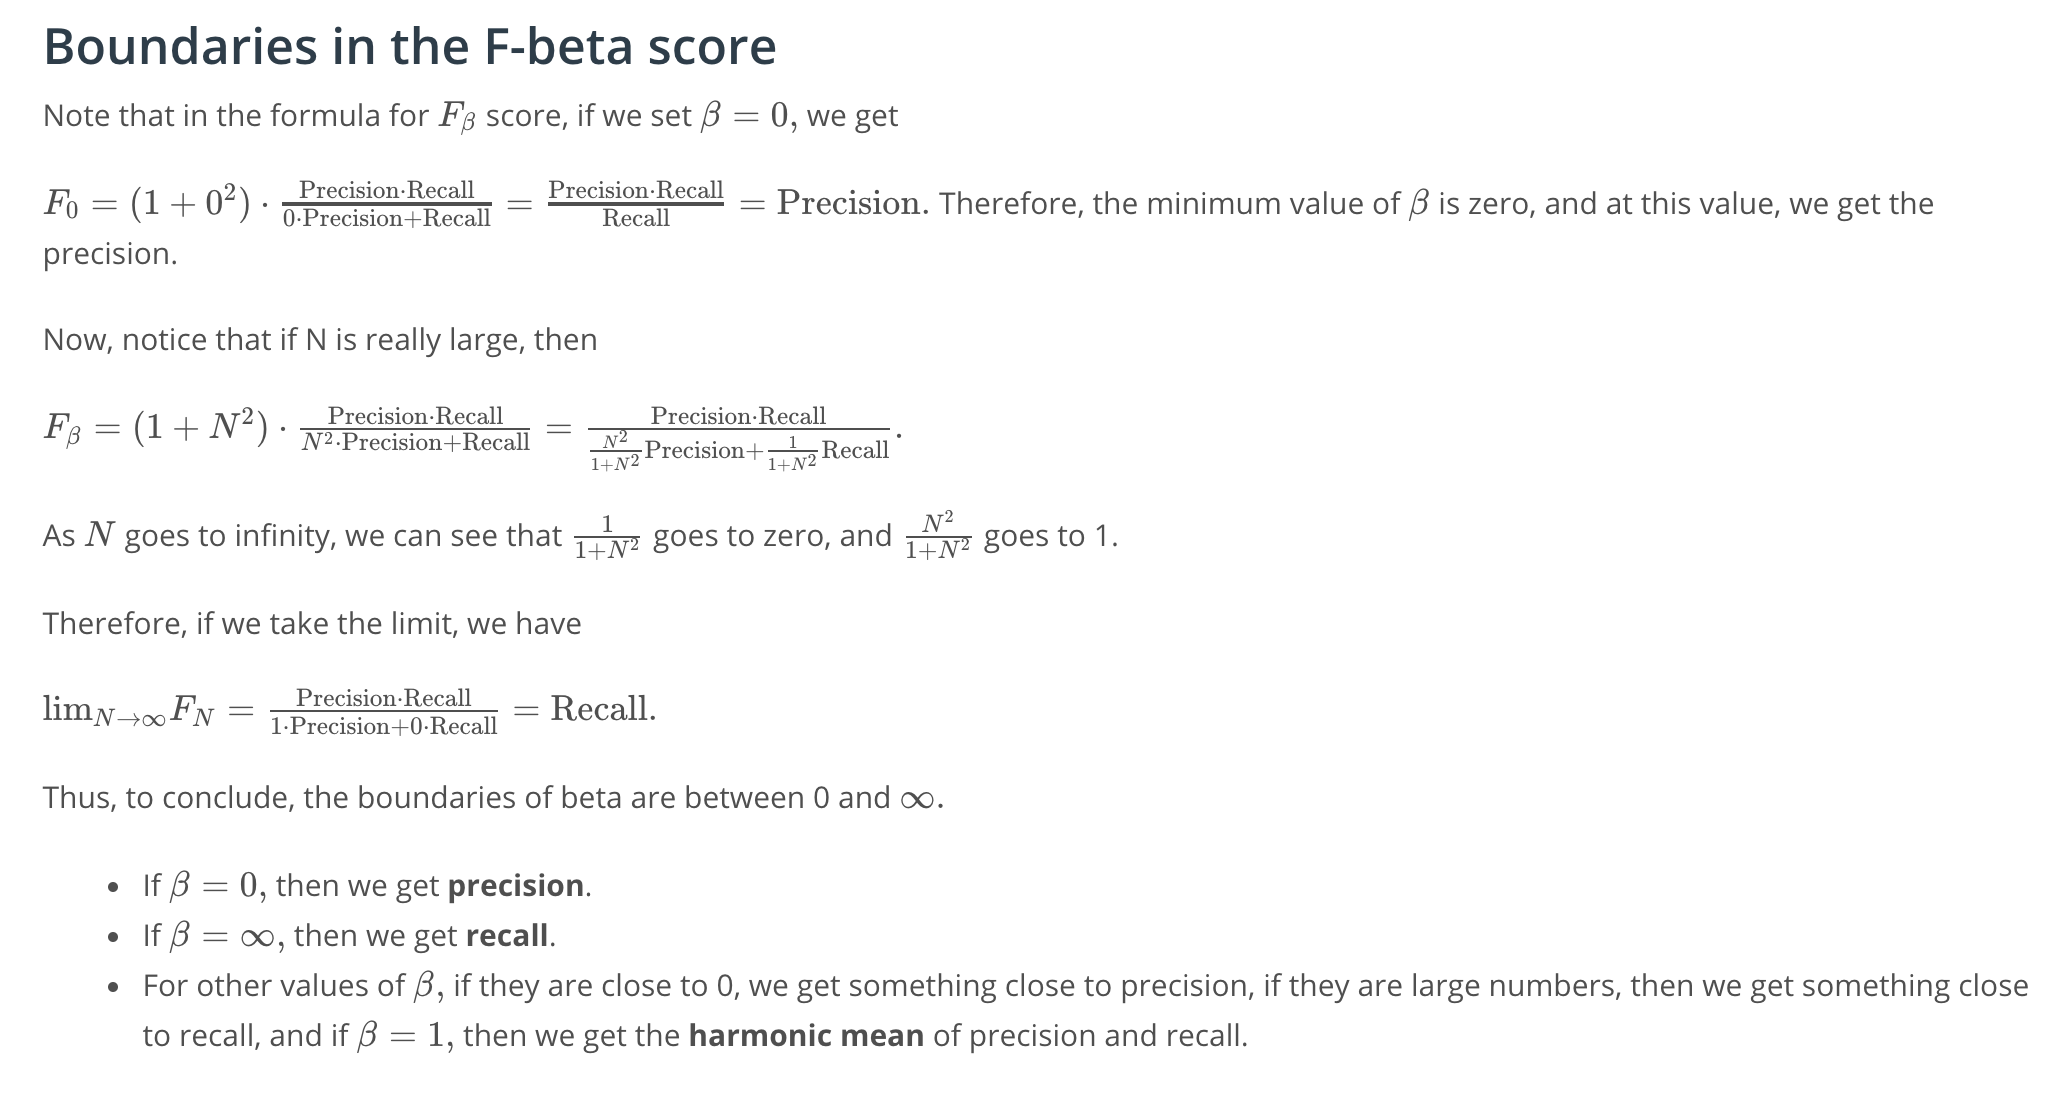




### multi-class confusion matix

In [56]:
df = pd.DataFrame.from_dict({'A':[13,4,1,1,0,0,1],
                   'B':[0,55,0,8,0,0,0],
                   'C':[0,1,25,8,0,0,2],
                   'D':[0,3,0,123,0,0,1],
                   'E':[0,1,0,7,14,0,4],
                   'F':[0,3,0,2,1,10,0],
                   'G':[0,0,1,7,0,0,26]}, orient = 'index')
df.columns = list('ABCDEFG')
df.sort_index(inplace=True)
display(df)
# index is TRUE, columns is predicted

,A,B,C,D,E,F,G
A,13,4,1,1,0,0,1
B,0,55,0,8,0,0,0
C,0,1,25,8,0,0,2
D,0,3,0,123,0,0,1
E,0,1,0,7,14,0,4
F,0,3,0,2,1,10,0
G,0,0,1,7,0,0,26


In [75]:
# recall, precision of B
# TP, FP, FN for C: TP = 25, FP = 1 +1, FN = 1+8+2

# print df.loc['C'].sum()

def confusion_metric(target):
    TP = df.loc[target, target]
    FP = df[target].sum() - TP
    FN = df.loc[target].sum() - TP
    recall = round(TP*1.0/(TP + FN),2)
    precision = round(TP*1.0/(TP + FP),2)
    print 'Given %c \nTP is %s, FP is %s, FN is %s, recall is %s, precision is %s'% (target,TP, FP, FN, recall, precision)

if False:
    confusion_metric("C")




Given C 
TP is 25, FP is 2, FN is 11, recall is 0.69, precision is 0.93


In [1]:
# import statements for the classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np


df = pd.read_csv('testdata.csv')
X = np.array(df[['x1','x2']])
y = np.array(df['y'])

# Logistic Regression Classifier
classifier = LogisticRegression()
classifier.fit(X,y)

# Decision Tree Classifier
classifier = GradientBoostingClassifier()
classifier.fit(X,y)

# Support Vector Machine Classifier
classifier = SVC()
classifier.fit(X,y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)